In [1]:
import numpy as np
import tensorflow as tf

num_points = 2000
vectors_set = []

for i in range(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9),
                           np.random.normal(0.0, 0.9)])
        
    else:
        vectors_set.append([np.random.normal(3.0, 0.5),
                           np.random.normal(1.0, 0.5)])

C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

C:\___Anaconda\envs\forTFgpu\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


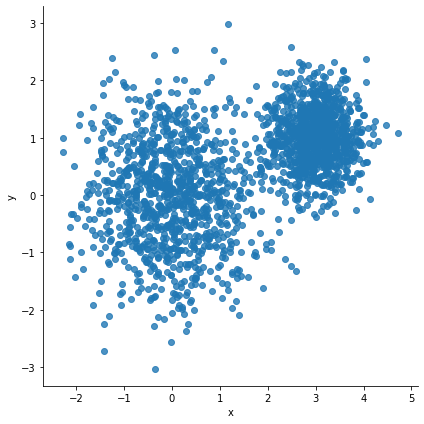

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'x': [v[0] for v in vectors_set],
                  'y': [v[1] for v in vectors_set]})
sns.lmplot('x', 'y', data=df, fit_reg=False, size=6)
plt.show()

In [6]:


vectors = tf.constant(vectors_set) # shape(2000, 2)
k = 4
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [k, -1])) # shape(4, 2)

expanded_vectors = tf.expand_dims(vectors, 0) # shape(1, 2000, 2)
expanded_centroids = tf.expand_dims(centroids, 1) # shape(4, 1, 2)

diff = tf.subtract(expanded_vectors, expanded_centroids) # shape(4, 2000, 2)
sqr = tf.square(diff) #shape(4, 2000, 2)
distances = tf.reduce_sum(sqr, 2) #shape(4, 2000)
assignments = tf.argmin(distances, 0) # shape(2000)


means = tf.concat([tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1, -1])),
                                 reduction_indices=[1]) for c in range(k)], 0) # shape(4,2)

update_centroids = tf.assign(centroids, means)
init_op = tf.global_variables_initializer()

In [7]:
sess = tf.Session()
sess.run(init_op)

for step in range(100):
    _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])
    print(centroid_values)
    

[[ 3.2645478   1.4056451 ]
 [-0.40228552  0.21020472]
 [ 3.2001283   1.2865095 ]
 [-0.6025748  -0.8433337 ]]
[[ 3.3039365   1.6079943 ]
 [-0.02845063  0.48371398]
 [ 2.8690667   0.8282922 ]
 [-0.27529687 -0.97760123]]
[[ 3.2262383   1.5010271 ]
 [-0.02235721  0.58288574]
 [ 2.8415155   0.73253804]
 [-0.2495737  -0.88217086]]
[[ 3.189086    1.4351454 ]
 [-0.01003748  0.63872397]
 [ 2.8161852   0.6738576 ]
 [-0.25136557 -0.817772  ]]
[[ 3.1816747   1.384451  ]
 [-0.01127404  0.6722601 ]
 [ 2.7800694   0.63759756]
 [-0.24796176 -0.7813205 ]]
[[ 3.1827178   1.3427986 ]
 [-0.0230237   0.6931413 ]
 [ 2.7423081   0.6132563 ]
 [-0.23398302 -0.7627672 ]]
[[ 3.193311    1.2996099 ]
 [-0.03516048  0.7136752 ]
 [ 2.6888316   0.5887385 ]
 [-0.23180978 -0.7523615 ]]
[[ 3.2034445   1.2636572 ]
 [-0.04364366  0.7212511 ]
 [ 2.6335957   0.57698417]
 [-0.23488192 -0.74666864]]
[[ 3.2178519   1.2230766 ]
 [-0.05863784  0.72715133]
 [ 2.559562    0.57298344]
 [-0.23841077 -0.74306345]]
[[ 3.226395    1.19